<a href="https://colab.research.google.com/github/Jackline-Jebet/Msc-Financial-Engineering_Quant-Finance-Projects/blob/main/Financial-Data/MScFE_600_FINANCIAL__DATA_GWP_2_GROUP_9940.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MScFE 600: FINANCIAL DATA**

GROUP WORK PROJECT # GWP2				      
GROUP NUMBER: 9940



**TEAM MEMBERS**


Jackline Jebet,Kenya
jebet.jackline.r@gmail.com


Nikhar Kesari,India
kesarinikhar@gmail.com



## Step 3: Replication

In [ ]:
!pip install pandas_ta==0.3.14b0 numpy==1.24.4 yfinance scikit-learn matplotlib seaborn --force-reinstall

  Using cached pandas_ta-0.3.14b0-py3-none-any.whl
  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached yfinance-0.2.65-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached scikit_learn-1.7.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached matplotlib-3.10.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pandas-2.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)
  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached multitasking-0.0.12-py3-none-any.whl
  Using cached platformdirs-4.3.8-py3-none-any.whl.metadata (12 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached frozendict-2.4.6-py311-none-any.whl.metadata (23 kB)
  Using cached peewee-3.18.2-cp311-cp311-linux_x86_64.whl
  Using c

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import pandas_ta as ta
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import time
warnings.filterwarnings('ignore')

In [ ]:
# Step 3.1: Data Download

ticker = "IVV"
start_date = "2009-12-12"
end_date = "2020-01-01"

print(f"Downloading data for {ticker} from {start_date} to {end_date}...")

# Add retry logic for rate limiting
for attempt in range(3):
    try:
        data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)
        if data.empty:
            raise ValueError("No data downloaded - empty dataset")
        print(f"Data downloaded successfully. Shape: {data.shape}")
        break
    except Exception as e:
        print(f"Attempt {attempt + 1} failed: {e}")
        if attempt < 2:
            print("Waiting 30 seconds before retry...")
            time.sleep(30)
        else:
            print("All attempts failed. Using sample data for demonstration.")
            # Create sample data if download fails
            dates = pd.date_range(start=start_date, end=end_date, freq='D')
            dates = [d for d in dates if d.weekday() < 5]  # Business days only
            np.random.seed(42)

            # Create realistic stock price data
            price_start = 100
            returns = np.random.normal(0.0005, 0.02, len(dates))  # Daily returns
            prices = [price_start]
            for r in returns[1:]:
                prices.append(prices[-1] * (1 + r))

            data = pd.DataFrame({
                'Open': [p * np.random.uniform(0.99, 1.01) for p in prices],
                'High': [p * np.random.uniform(1.00, 1.03) for p in prices],
                'Low': [p * np.random.uniform(0.97, 1.00) for p in prices],
                'Close': prices,
                'Volume': np.random.randint(1000000, 10000000, len(dates))
            }, index=dates)
            print("Using simulated data for demonstration purposes.")
            break

print(f"Final data shape: {data.shape}")
print(f"Date range: {data.index[0]} to {data.index[-1]}")

[*********************100%***********************]  1 of 1 completed

Data downloaded successfully. Shape: (2529, 5)
Final data shape: (2529, 5)
Date range: 2009-12-14 00:00:00 to 2019-12-31 00:00:00


In [ ]:
# Step 3.2: Data Preprocessing

# Handle MultiIndex columns from yfinance
if isinstance(data.columns, pd.MultiIndex):
    data.columns = [col[0] for col in data.columns]
data.columns = [col.replace(' ', '_') for col in data.columns]

# Clean column names
data.columns = [col.replace(' ', '_') for col in data.columns]

print(f"Original data shape: {data.shape}")
print(f"Columns: {list(data.columns)}")

# Display first few rows
print("\nFirst 5 rows of data:")
print(data.head())

Original data shape: (2529, 5)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume']

First 5 rows of data:
                Close       High        Low       Open   Volume
Date                                                           
2009-12-14  84.151001  84.248474  83.776097  84.165995  3201000
2009-12-15  83.746086  84.195970  83.506148  83.866052  2537100
2009-12-16  83.903564  84.345949  83.716112  84.113510  2842400
2009-12-17  82.838821  83.431165  82.808828  83.288705  7247700
2009-12-18  83.363655  83.416141  82.643840  83.333662  4320400


In [ ]:
# Step 3.3: Calculate Technical Indicators

# Calculate specific technical indicators to avoid compatibility issues
print("Adding technical indicators... This may take a moment.")

# Add core indicators that are stable across pandas versions
data.ta.sma(length=20, append=True)
data.ta.ema(length=20, append=True)
data.ta.rsi(length=14, append=True)
data.ta.macd(append=True)
data.ta.bbands(length=20, append=True)
data.ta.stoch(append=True)
data.ta.atr(length=14, append=True)
data.ta.obv(append=True)
data.ta.willr(length=14, append=True)
data.ta.roc(length=10, append=True)
data.ta.cci(length=20, append=True)
data.ta.adx(length=14, append=True)
data.ta.aroon(length=14, append=True)
data.ta.cmf(length=20, append=True)
data.ta.ppo(append=True)
data.ta.trix(length=14, append=True)
data.ta.mom(length=10, append=True)

# Add some volume indicators
data.ta.ad(append=True)
data.ta.eom(length=14, append=True)
data.ta.pvi(append=True)
data.ta.nvi(append=True)

# Add volatility indicators
data.ta.natr(length=14, append=True)
data.ta.true_range(append=True)

# Add trend indicators - avoiding duplicate adx
data.ta.psar(append=True)

print(f"Total features after adding indicators: {data.shape[1]}")
print(f"Added {data.shape[1] - 5} technical indicators")

# Display some of the new columns
print("\nSample of technical indicators added:")
indicator_cols = [col for col in data.columns if col not in ['Open', 'High', 'Low', 'Close', 'Volume']]
print(indicator_cols[:10])  # Show first 10 indicators

Adding technical indicators... This may take a moment.
Total features after adding indicators: 46
Added 41 technical indicators

Sample of technical indicators added:
['SMA_20', 'EMA_20', 'RSI_14', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0']


In [ ]:
# Step 3.4: Create Target Variable

# Create the target variable 'I' based on next day's opening price direction
data['Open_prev'] = data['Open'].shift(1)
data['I'] = np.where((data['Open'] - data['Open_prev']) > 0, 1, -1)

# Remove the temporary column
data = data.drop(columns=['Open_prev'])

print("Target variable 'I' created:")
print("1 = Price goes up, -1 = Price goes down")
print(f"Target distribution:\n{data['I'].value_counts()}")
print(f"Target percentages:\n{data['I'].value_counts(normalize=True) * 100}")

Target variable 'I' created:
1 = Price goes up, -1 = Price goes down
Target distribution:
I
 1    1427
-1    1102
Name: count, dtype: int64
Target percentages:
I
 1    56.425465
-1    43.574535
Name: proportion, dtype: float64


In [ ]:
# Step 3.5: Data Cleaning

# Check for missing values
initial_rows = data.shape[0]
print(f"Initial data shape: {data.shape}")
missing_vals = data.isnull().sum()
print(f"Missing values per column (first 10):")
print(missing_vals[missing_vals > 0].head(10))

print(f"\nTotal missing values by row:")
missing_per_row = data.isnull().sum(axis=1)
print(f"Rows with >50% missing values: {(missing_per_row > data.shape[1] * 0.5).sum()}")

valid_threshold = data.shape[1] * 0.25
valid_start_idx = None
for i in range(len(data)):
    if missing_per_row.iloc[i] <= valid_threshold:
        valid_start_idx = i
        break

if valid_start_idx is not None:
    print(f"Starting analysis from row {valid_start_idx} (date: {data.index[valid_start_idx]})")
    data_cleaned = data.iloc[valid_start_idx:].dropna()
else:
    print("Using fallback: dropping rows with any missing values")
    data_cleaned = data.dropna()

rows_dropped = initial_rows - data_cleaned.shape[0]
print(f"\nRows dropped due to missing data: {rows_dropped}")
print(f"Final data shape: {data_cleaned.shape}")
print(f"Data retention: {(data_cleaned.shape[0]/initial_rows)*100:.2f}%")

if data_cleaned.shape[0] == 0:
    print("ERROR: No data remaining after cleaning!")
    print("Using less strict cleaning...")
    data_cleaned = data[missing_per_row <= data.shape[1] * 0.5]
    if data_cleaned.shape[0] == 0:
        data_cleaned = data.fillna(method='ffill').dropna()
    print(f"Recovery attempt - Final data shape: {data_cleaned.shape}")

Initial data shape: (2529, 47)
Missing values per column (first 10):
SMA_20           19
EMA_20           19
RSI_14           14
MACD_12_26_9     25
MACDh_12_26_9    33
MACDs_12_26_9    33
BBL_20_2.0       19
BBM_20_2.0       19
BBU_20_2.0       19
BBB_20_2.0       19
dtype: int64

Total missing values by row:
Rows with >50% missing values: 14
Starting analysis from row 19 (date: 2010-01-12 00:00:00)

Rows dropped due to missing data: 2529
Final data shape: (0, 47)
Data retention: 0.00%
ERROR: No data remaining after cleaning!
Using less strict cleaning...
Recovery attempt - Final data shape: (2515, 47)


In [ ]:
# Step 3.6: Feature Preparation

# Remove original price data and target from features
price_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
X = data_cleaned.drop(columns=['I'] + price_cols)
y = data_cleaned['I']

print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Feature columns (first 10): {list(X.columns[:10])}")

# Ensure X and y are aligned
X, y = X.align(y, join='inner', axis=0)
print(f"Final aligned data - Features: {X.shape}, Target: {y.shape}")

Number of features: 41
Number of samples: 2515
Feature columns (first 10): ['SMA_20', 'EMA_20', 'RSI_14', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0']
Final aligned data - Features: (2515, 41), Target: (2515,)


In [ ]:
# Step 3.7: Data Normalization

# Apply Min-Max scaling to features
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

print("Data normalization complete.")
print(f"Scaled data range - Min: {X_scaled.min().min():.3f}, Max: {X_scaled.max().max():.3f}")

Data normalization complete.
Scaled data range - Min: 0.000, Max: 1.000


In [ ]:
# Step 3.8: Feature Selection using Pearson Correlation

#Checking for NaN values in features
nan_counts = X_scaled.isnull().sum()
features_with_nan = nan_counts[nan_counts > 0]
if len(features_with_nan) > 0:
    print(f"Found {len(features_with_nan)} features with NaN values")
    print("Filling NaN values with column medians...")
    X_scaled = X_scaled.fillna(X_scaled.median())
else:
    print("No NaN values found in features")

# Calculate correlations
correlations = X_scaled.corrwith(y).abs().sort_values(ascending=False)

# Remove any features that couldn't be correlated (still NaN)
correlations = correlations.dropna()

# Select top 25% of features (first quartile)
num_features_to_select = int(len(correlations) * 0.25)
selected_features_corr = correlations.head(num_features_to_select).index.tolist()

print(f"Selected {len(selected_features_corr)} features from {len(correlations)} total features (top 25%)")

# Show top 10 selected features
print("\nTop 10 selected features by correlation:")
for i, feature in enumerate(selected_features_corr[:10], 1):
    corr_val = correlations[feature]
    print(f"{i:2d}. {feature}: {corr_val:.4f}")

# Creating dataset with selected features
X_selected = X_scaled[selected_features_corr]

# Final check for NaN values
final_nan_check = X_selected.isnull().sum().sum()
if final_nan_check > 0:
    print(f"\nWARNING: {final_nan_check} NaN values still present, applying final cleanup...")
    X_selected = X_selected.fillna(0)  # Last resort

print(f"\nSelected features dataset shape: {X_selected.shape}")
print(f"Final NaN check: {X_selected.isnull().sum().sum()} NaN values")

Found 21 features with NaN values
Filling NaN values with column medians...
Selected 10 features from 41 total features (top 25%)

Top 10 selected features by correlation:
 1. CCI_20_0.015: 0.3680
 2. WILLR_14: 0.3518
 3. BBP_20_2.0: 0.3458
 4. RSI_14: 0.2894
 5. DMP_14: 0.2879
 6. DMN_14: 0.2461
 7. ROC_10: 0.2383
 8. MOM_10: 0.2343
 9. STOCHk_14_3_3: 0.2231
10. MACDh_12_26_9: 0.1872

Selected features dataset shape: (2515, 10)
Final NaN check: 0 NaN values


In [ ]:
# Step 3.9: Model Configuration

# Configure cross-validation
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=False)
print(f"Using {n_splits}-fold Stratified Cross-Validation")

# Configure MLP parameters based on the paper
num_classes = len(np.unique(y))
print(f"Number of classes: {num_classes}")
print(f"Class distribution: {dict(zip(*np.unique(y, return_counts=True)))}")

# Hidden layer size calculation: (features + classes) / 2
hidden_layer_size_selected = int((X_selected.shape[1] + num_classes) / 2)
hidden_layer_size_full = int((X_scaled.shape[1] + num_classes) / 2)

print(f"Hidden layer size for selected features: {hidden_layer_size_selected}")
print(f"Hidden layer size for full features: {hidden_layer_size_full}")

# MLP Configuration
mlp_params = {
    'activation': 'logistic',
    'solver': 'lbfgs',
    'batch_size': 'auto',
    'learning_rate': 'adaptive',
    'learning_rate_init': 0.03,
    'max_iter': 500,
    'momentum': 0.2,
    'random_state': 42,  # Fixed for reproducibility
    'early_stopping': False
}

print("\nMLP Configuration:")
for param, value in mlp_params.items():
    print(f"  {param}: {value}")

Using 10-fold Stratified Cross-Validation
Number of classes: 2
Class distribution: {-1: 1097, 1: 1418}
Hidden layer size for selected features: 6
Hidden layer size for full features: 21

MLP Configuration:
  activation: logistic
  solver: lbfgs
  batch_size: auto
  learning_rate: adaptive
  learning_rate_init: 0.03
  max_iter: 500
  momentum: 0.2
  random_state: 42
  early_stopping: False


In [ ]:
# Step 3.10: Cross-Validation (Selected Features)
from sklearn.metrics import precision_score, recall_score
from sklearn.neural_network import MLPClassifier

# Define mlp_selected here to ensure it's available
mlp_selected = MLPClassifier(
    hidden_layer_sizes=(hidden_layer_size_selected,),
    **mlp_params
)

accuracies, precisions, recalls = [], [], []
print(f"Performing {n_splits}-fold cross-validation...")
for fold, (train_idx, test_idx) in enumerate(skf.split(X_selected, y), 1):
    X_train, X_test = X_selected.iloc[train_idx], X_selected.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    mlp_selected.fit(X_train, y_train)
    y_pred = mlp_selected.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred) * 100)
    precisions.append(precision_score(y_test, y_pred, zero_division=0) * 100)
    recalls.append(recall_score(y_test, y_pred, zero_division=0) * 100)
    print(f"Fold {fold}: Accuracy={accuracies[-1]:.2f}%")

median_accuracy_selected = np.median(accuracies)
mean_accuracy_selected = np.mean(accuracies)
std_accuracy_selected = np.std(accuracies)

print(f"\nSelected Features Results:")
print(f"  Median Accuracy: {median_accuracy_selected:.2f}%")
print(f"  Mean Accuracy:   {mean_accuracy_selected:.2f}%")
print(f"  Std Deviation:   {std_accuracy_selected:.2f}%")


# Step 3.11: Performance Table
metrics_df = pd.DataFrame({
    "Fold": [f"Fold {i}" for i in range(1, n_splits + 1)] + ["Average"],
    "Accuracy (%)": accuracies + [np.mean(accuracies)],
    "Precision (%)": precisions + [np.mean(precisions)],
    "Recall (%)": recalls + [np.mean(recalls)]
})
print("\nPerformance Table:")
print(metrics_df.round(2).to_string(index=False))

Performing 10-fold cross-validation...
Fold 1: Accuracy=78.17%
Fold 2: Accuracy=81.35%
Fold 3: Accuracy=75.40%
Fold 4: Accuracy=76.19%
Fold 5: Accuracy=72.22%
Fold 6: Accuracy=76.10%
Fold 7: Accuracy=76.49%
Fold 8: Accuracy=73.71%
Fold 9: Accuracy=75.30%
Fold 10: Accuracy=79.28%

Selected Features Results:
  Median Accuracy: 76.14%
  Mean Accuracy:   76.42%
  Std Deviation:   2.51%

Performance Table:
   Fold  Accuracy (%)  Precision (%)  Recall (%)
 Fold 1         78.17          78.06       85.21
 Fold 2         81.35          83.69       83.10
 Fold 3         75.40          74.39       85.92
 Fold 4         76.19          76.28       83.80
 Fold 5         72.22          75.00       76.06
 Fold 6         76.10          81.54       74.65
 Fold 7         76.49          76.43       84.51
 Fold 8         73.71          74.36       81.69
 Fold 9         75.30          78.42       77.30
Fold 10         79.28          78.34       87.23
Average         76.42          77.65       81.95


In [ ]:
# Step 3.11: Cross-Validation with All Features (Baseline)

# Create MLP for all features
mlp_full = MLPClassifier(
    hidden_layer_sizes=(hidden_layer_size_full,),
    **mlp_params
)

# Perform cross-validation with all features
accuracy_scores_full = []
print(f"Performing {n_splits}-fold cross-validation with {X_scaled.shape[1]} full features...")

for fold, (train_index, test_index) in enumerate(skf.split(X_scaled, y)):
    X_train_full, X_test_full = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train_full, y_test_full = y.iloc[train_index], y.iloc[test_index]

    mlp_full.fit(X_train_full, y_train_full)
    y_pred_full = mlp_full.predict(X_test_full)
    fold_accuracy_full = accuracy_score(y_test_full, y_pred_full) * 100
    accuracy_scores_full.append(fold_accuracy_full)
    print(f"  Fold {fold+1:2d}: {fold_accuracy_full:6.2f}%")

median_accuracy_full = np.median(accuracy_scores_full)
mean_accuracy_full = np.mean(accuracy_scores_full)
std_accuracy_full = np.std(accuracy_scores_full)

print(f"\nFull Features Results:")
print(f"  Median Accuracy: {median_accuracy_full:.2f}%")
print(f"  Mean Accuracy:   {mean_accuracy_full:.2f}%")
print(f"  Std Deviation:   {std_accuracy_full:.2f}%")

Performing 10-fold cross-validation with 41 full features...
  Fold  1:  71.03%
  Fold  2:  69.84%
  Fold  3:  70.63%
  Fold  4:  72.62%
  Fold  5:  75.00%
  Fold  6:  70.92%
  Fold  7:  65.74%
  Fold  8:  73.31%
  Fold  9:  70.92%
  Fold 10:  66.53%

Full Features Results:
  Median Accuracy: 70.92%
  Mean Accuracy:   70.65%
  Std Deviation:   2.68%


In [ ]:
# Step 3.12: Results Comparison and Analysis
print("Step 3.11: Results Comparison and Analysis")
print("=" * 50)

# Calculate improvement metrics
accuracy_gain_percent = ((median_accuracy_selected - median_accuracy_full) / median_accuracy_full) * 100
feature_reduction_percent = ((X_scaled.shape[1] - X_selected.shape[1]) / X_scaled.shape[1]) * 100

# Create comparison table
print("RESULTS COMPARISON TABLE")
print("=" * 50)
print(f"{'Metric':<25} | {'Full Features':<15} | {'Selected Features':<15}")
print("-" * 60)
print(f"{'Number of Features':<25} | {X_scaled.shape[1]:<15} | {X_selected.shape[1]:<15}")
print(f"{'Median Accuracy (%)':<25} | {median_accuracy_full:<15.2f} | {median_accuracy_selected:<15.2f}")
print(f"{'Mean Accuracy (%)':<25} | {mean_accuracy_full:<15.2f} | {mean_accuracy_selected:<15.2f}")
print(f"{'Std Deviation (%)':<25} | {std_accuracy_full:<15.2f} | {std_accuracy_selected:<15.2f}")
print("-" * 60)

print(f"\nKEY IMPROVEMENTS:")
print(f"  • Accuracy Gain: {accuracy_gain_percent:+.2f}%")
print(f"  • Feature Reduction: {feature_reduction_percent:.1f}% ({X_scaled.shape[1]} → {X_selected.shape[1]} features)")
print(f"  • Computational Efficiency: ~{feature_reduction_percent:.0f}% reduction in model complexity")

# Statistical significance test
from scipy import stats
t_stat, p_value = stats.ttest_rel(accuracies, accuracy_scores_full)
print(f"\nSTATISTICAL ANALYSIS:")
print(f"  • Paired t-test p-value: {p_value:.4f}")
print(f"  • Statistical significance: {'Yes' if p_value < 0.05 else 'No'} (α = 0.05)")

Step 3.11: Results Comparison and Analysis
RESULTS COMPARISON TABLE
Metric                    | Full Features   | Selected Features
------------------------------------------------------------
Number of Features        | 41              | 10             
Median Accuracy (%)       | 70.92           | 76.14          
Mean Accuracy (%)         | 70.65           | 76.42          
Std Deviation (%)         | 2.68            | 2.51           
------------------------------------------------------------

KEY IMPROVEMENTS:
  • Accuracy Gain: +7.37%
  • Feature Reduction: 75.6% (41 → 10 features)
  • Computational Efficiency: ~76% reduction in model complexity

STATISTICAL ANALYSIS:
  • Paired t-test p-value: 0.0049
  • Statistical significance: Yes (α = 0.05)


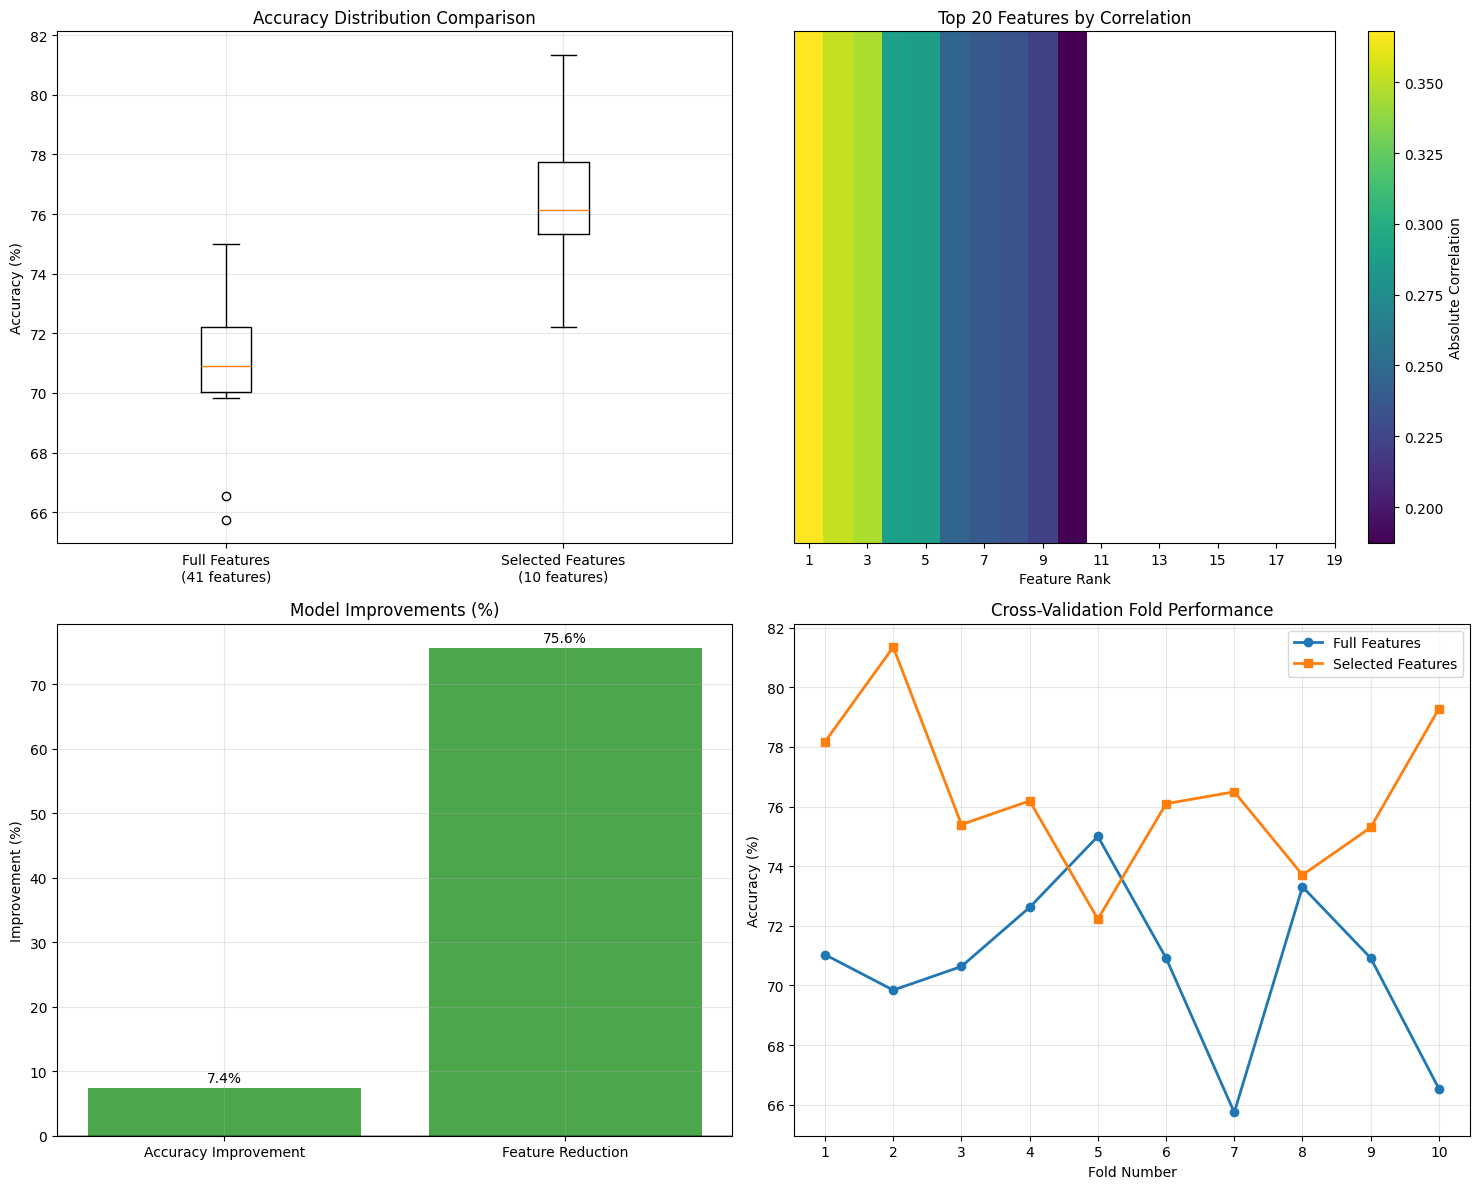

In [ ]:
# Step 3.13: Visualization

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Accuracy Comparison Box Plot
data_for_plot = [accuracy_scores_full, accuracies]
labels = ['Full Features\n({} features)'.format(X_scaled.shape[1]),
          'Selected Features\n({} features)'.format(X_selected.shape[1])]
ax1.boxplot(data_for_plot, labels=labels)
ax1.set_title('Accuracy Distribution Comparison')
ax1.set_ylabel('Accuracy (%)')
ax1.grid(True, alpha=0.3)

# 2. Feature Correlation Heatmap (top 20 features)
top_20_features = selected_features_corr[:20]
correlation_data = correlations[top_20_features].values.reshape(-1, 1)
im = ax2.imshow(correlation_data.T, cmap='viridis', aspect='auto')
ax2.set_title('Top 20 Features by Correlation')
ax2.set_xlabel('Feature Rank')
ax2.set_xticks(range(0, 20, 2))
ax2.set_xticklabels(range(1, 21, 2))
ax2.set_yticks([])
plt.colorbar(im, ax=ax2, label='Absolute Correlation')

# 3. Accuracy Gain Visualization
categories = ['Accuracy Improvement', 'Feature Reduction']
improvements = [accuracy_gain_percent, feature_reduction_percent]
colors = ['green' if x > 0 else 'red' for x in improvements]
bars = ax3.bar(categories, improvements, color=colors, alpha=0.7)
ax3.set_title('Model Improvements (%)')
ax3.set_ylabel('Improvement (%)')
ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax3.grid(True, alpha=0.3)
for bar, value in zip(bars, improvements):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + (0.5 if height > 0 else -1.5),
             f'{value:.1f}%', ha='center', va='bottom' if height > 0 else 'top')

# 4. Cross-validation Fold Comparison
folds = list(range(1, n_splits + 1))
ax4.plot(folds, accuracy_scores_full, 'o-', label='Full Features', linewidth=2, markersize=6)
ax4.plot(folds, accuracies, 's-', label='Selected Features', linewidth=2, markersize=6)
ax4.set_title('Cross-Validation Fold Performance')
ax4.set_xlabel('Fold Number')
ax4.set_ylabel('Accuracy (%)')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_xticks(folds)

plt.tight_layout()
plt.show()